<a href="https://colab.research.google.com/github/divyavchandran/Deeplearning-for-CV/blob/main/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hyper parameter from kerastuner ;google kerastuner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import os
os.chdir('/content/drive/MyDrive/FDP_ML_DL')
!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.2


Using Fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:

np.min(train_images)

0

In [8]:
np.max(train_images)

255

In [9]:

np.min(test_images)

0

In [10]:

np.max(test_images)

255

In [12]:
#scaling
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 0.00392156862745098
Test Minimum 0.0
Test Maximum 0.00392156862745098


In [14]:
train_images[0].shape

(28, 28)

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

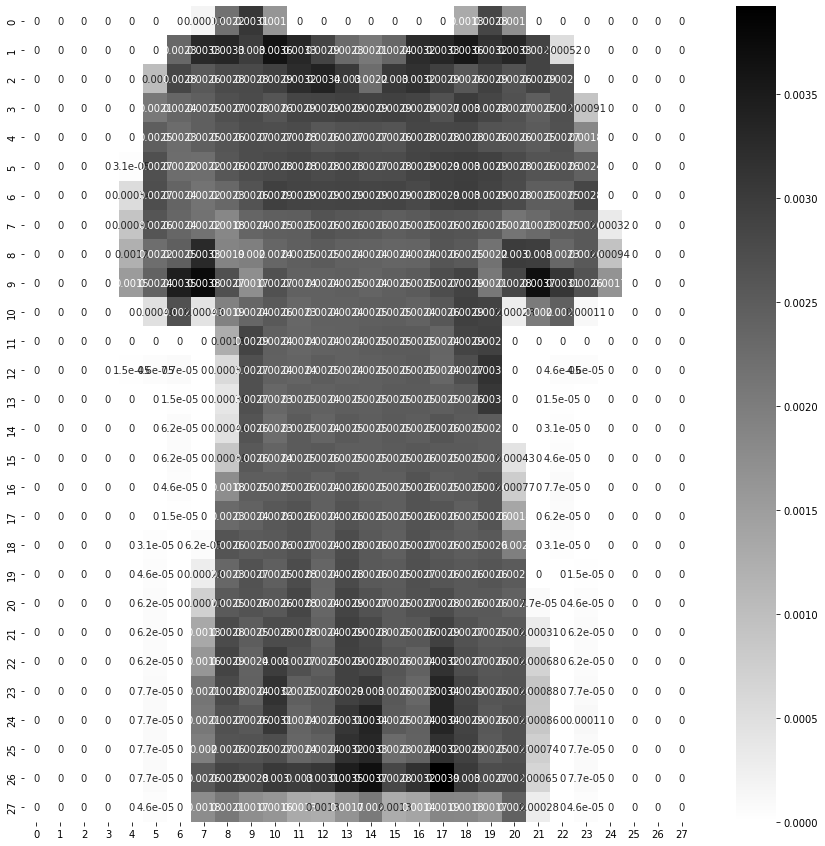

In [20]:
plt.figure(figsize=(15,15)) # (15,15) means width and height
sns.heatmap(train_images[10],annot=True,cmap='binary')

In [21]:
#Reshaping the data to feed it to CNN ; 3D to 4D(the data should be in 4d to give that to CNN)
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [22]:
# hp:hyperparameter: filters, kernal size. for conv1  layer: here no of filters from 32 to 128 with an increment of 16 of sizes 3x3 and 5x5
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    # NN: hidden layer
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    #output layer(if it is a binary classification:activation fn is sigmoid fn. here but multiclass)
    keras.layers.Dense(10, activation='softmax')
  ])
  # gradient descent: learning rate will be a constant. Learning rate decides the how much change should be done to weights; generally 0.02
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [23]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-23-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [24]:
##searching the best values using random search
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [25]:
#searching the best values
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 23s]
val_accuracy: 0.1054999977350235

Best val_accuracy So Far: 0.8295000195503235
Total elapsed time: 00h 02m 28s


In [27]:
# choosing the best model
model=tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 48)        1248      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        76864     
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 112)               2867312   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 2,946,554
Trainable params: 2,946,554
Non-trainable params: 0
_________________________________________________________________


In [29]:
# training the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4408 - accuracy: 0.8411 - val_loss: 0.4479 - val_accuracy: 0.8375
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4056 - accuracy: 0.8551 - val_loss: 0.3923 - val_accuracy: 0.8575
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3763 - accuracy: 0.8645 - val_loss: 0.4080 - val_accuracy: 0.8547
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3530 - accuracy: 0.8726 - val_loss: 0.3597 - val_accuracy: 0.8675
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3344 - accuracy: 0.8787 - val_loss: 0.3420 - val_accuracy: 0.8752
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3179 - accuracy: 0.8829 - val_loss: 0.3470 - val_accuracy: 0.8738
Epoch 10/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3064 - accuracy: 0.8872 - val_loss: 0.3321 - val_accurac

In [30]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8738


In [31]:
loss

0.3496640920639038

In [32]:

tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.001
Score: 0.8295000195503235
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.001
Score: 0.8111666440963745
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 32
learning_rate: 0.01
Score: 0.1054999977350235
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.01
Score: 0.1054999977350235
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 32
learning_rate: 0.01
Score: 0.1054999977350235
